# STAT 201: Group 34 Project

Abheet Kansal, Sebastian Csizmazia, Kaitlin Khu, Lim Pei Chan

## Surveying Crime Data in Vancouver

**INTRODUCTION:**
Background Information:
Vancouver’s crime rates have drastically increased recently, with a crime index of 39.18% (Numbeo, 2022), where crime levels of 40%-60% are considered moderate. This surge is due to the results of the loss of jobs caused by the pandemic (CBC News, 2022), increase in rent (CBC News, 2022), and the increased use of drugs often leading to homelessness, hence forcing many to commit crime in order to survive. It can then be deduced that more disadvantaged areas such as Downtown East Side, and South Vancouver neighborhoods (Webster, N.A.) would experience higher rates of crime. Hence, this results in an increasingly unsafe environment for Vancouver residents and requires increased surveillance by law enforcement in neighborhood areas. 


**Research Question:**
<i>H<sub>θ</sub></i> = The proportion of theft from vehicles among all other types of crime is the same in Central Business District and West End in Vancouver<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<i>H<sub>1</sub></i> = The proportion of theft from vehicles among all other types of crime in West End is less than the proportion in Central Business District in Vancouver

**Dataset Information:** 
The crime data set we will be using is from the <i>Crime Data Download<i/> published by the <i>Vancouver Police Department</i>. Looking specifically at the year 2022, in all the neighborhoods, and focusing on the crime type of: Crime Against a Person. 

<table style="width:100%">
  <tr>
    <th>Attribute</th>
    <th>Value</th>
  </tr>
  <tr>
    <td>Crime Type</td>
    <td>&nbsp;&nbsp;&nbsp;Crime Against Person</td>
  </tr>
  <tr>
    <td>Year</td>
    <td>&nbsp;&nbsp;&nbsp;2022</td>
  </tr>
  <tr>
      <td>Neighbourhood</td>
      <td>
          <ol type="1">
               <li><b>Central Buisness District</b></li>
               <li><b>West End</b></li>
          </ol>
      </td>
  </tr>
</table>
    
    
We’ve hypothesized that the neighborhood Central Business District and West end as both are located in Downtown Vancouver would have the highest rates of Crime Against a Person due to the nature of the neighborhood.


#### Loading packages

In [17]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(GGally)
library(ISLR)
library(infer)
options(repr.matrix.max.rows = 6)

First we need to load all of the packages required to clean, wrangle, visualize etc our data into this Jupyter notebook

#### Loading 2022 Crime Dataset of Vancouver

In [18]:
url = "https://raw.githubusercontent.com/abheetkansal/Dataset/main/crimedata_csv_AllNeighbourhoods_2022.csv"
crime_data <- read_csv(url)
head(crime_data)

Rows: 27883 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Theft from Vehicle,2022,4,16,9,58,1XX W HASTINGS ST,Central Business District,492101.0,5458837
Theft from Vehicle,2022,6,16,13,0,1XX W HASTINGS ST,Central Business District,492107.4,5458835
Theft from Vehicle,2022,4,19,19,0,1XX W HASTINGS ST,Central Business District,492113.5,5458843
Theft from Vehicle,2022,6,5,20,30,1XX W HASTINGS ST,Central Business District,492182.6,5458822
Theft from Vehicle,2022,4,16,19,17,1XX W HASTINGS ST,Central Business District,492197.2,5458808
Theft from Vehicle,2022,1,4,3,54,1XX W PENDER ST,Central Business District,492073.2,5458730


Making a variable `url` which contains the link to the data set that we are using, and reading it into a variable `crime_data` which will be used throughout.

#### Cleaning dataset for first hypothesis test

In [19]:
crime_data_cleaned <- crime_data %>% 
    filter(TYPE == "Offence Against a Person" | TYPE == "Other Theft")%>%
    filter(!is.na(NEIGHBOURHOOD)) %>%
    filter(!is.na(TYPE))%>%
    select(TYPE,NEIGHBOURHOOD)

head(crime_data_cleaned)

TYPE,NEIGHBOURHOOD
<chr>,<chr>
Offence Against a Person,Stanley Park
Offence Against a Person,Stanley Park
Offence Against a Person,West End
Offence Against a Person,West End
Offence Against a Person,West End
Offence Against a Person,West End


For our first hypothesis test we decided to use the crime types `Offence Against a Person` and `Other Theft`. In this cell we select these two crime types and filter out all of the other crime types recorded in our chosen dataset, aswell as filtering out any missing values.

#### Filtering the dataset with the crime in neighbourhoods Central Business District and West End as per the hypothesis test

In [1]:
crime_data_cleaned2 <- crime_data_cleaned  %>%
    filter(NEIGHBOURHOOD == "Central Business District" | NEIGHBOURHOOD == "West End")
head(crime_data_cleaned2)

ERROR: Error in crime_data_cleaned %>% filter(NEIGHBOURHOOD == "Central Business District" | : could not find function "%>%"


In our first hypothesis test we are only looking at our chosen crime types in the neighbourhoods of `Central Buisness District` and `West End`, so here filter out all neighbourhoods that are not those two. 

#### Counting the crime type per `NEIGHBOURHOOD` in question for crime with the crime `TYPE`

In [21]:
crime_count<-crime_data_cleaned2 %>%
    group_by(NEIGHBOURHOOD) %>%
    count(TYPE)
crime_count

NEIGHBOURHOOD,TYPE,n
<chr>,<chr>,<int>
Central Business District,Offence Against a Person,1148
Central Business District,Other Theft,2665
West End,Offence Against a Person,387
West End,Other Theft,686


We create `crime_count` which holds the number of our amount of times our chosen crimes  happened and were recorded in our chosen neighbourhoods, which we will later graph.

#### Calculating difference in proportions

In [22]:
obs_diff_prop1 <- crime_data_cleaned2 %>%
    specify(formula = TYPE ~ NEIGHBOURHOOD, success = "Offence Against a Person") %>%
    calculate(stat = "diff in props", order = c("Central Business District", "West End"))
obs_diff_prop1

stat
<dbl>
-0.05959575


Recorded above is the difference in proportions of `Offence Against a Person` crimes in our chosen neighbourhoods

In [23]:
obs_diff_prop2 <- crime_data_cleaned2 %>%
    specify(formula = TYPE ~ NEIGHBOURHOOD, success = "Other Theft") %>%
    calculate(stat = "diff in props", order = c("Central Business District", "West End"))
obs_diff_prop2

stat
<dbl>
0.05959575


Recorded above is the test statistic of `Other Theft` crimes in our chosen neighbourhoods

#### Plotting a bar graph for `crime_count` 

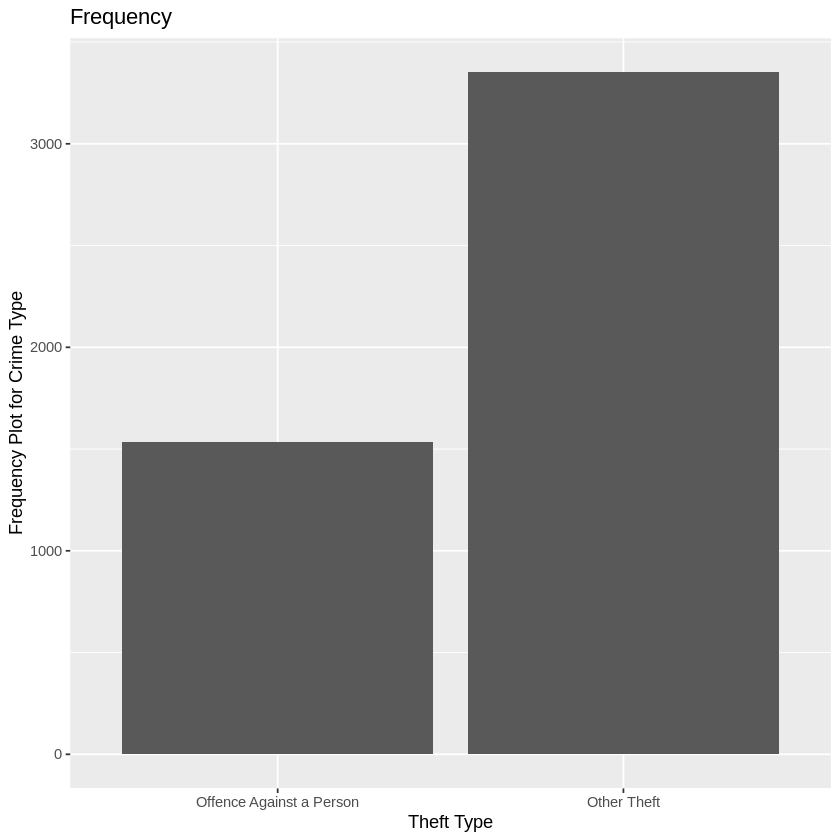

In [24]:
crime_data_count_plot <- crime_count %>%
       ggplot(aes(x = TYPE, y = n)) + 
       geom_col() +
       ggtitle("Frequency") +
       xlab("Theft Type")+
       ylab("Frequency Plot for Crime Type")

crime_data_count_plot

Visualizing the amount of times one of our chosen crimes was committed in our chosen neighbourhoods via a bar graph

#### Plotting a pair plot 

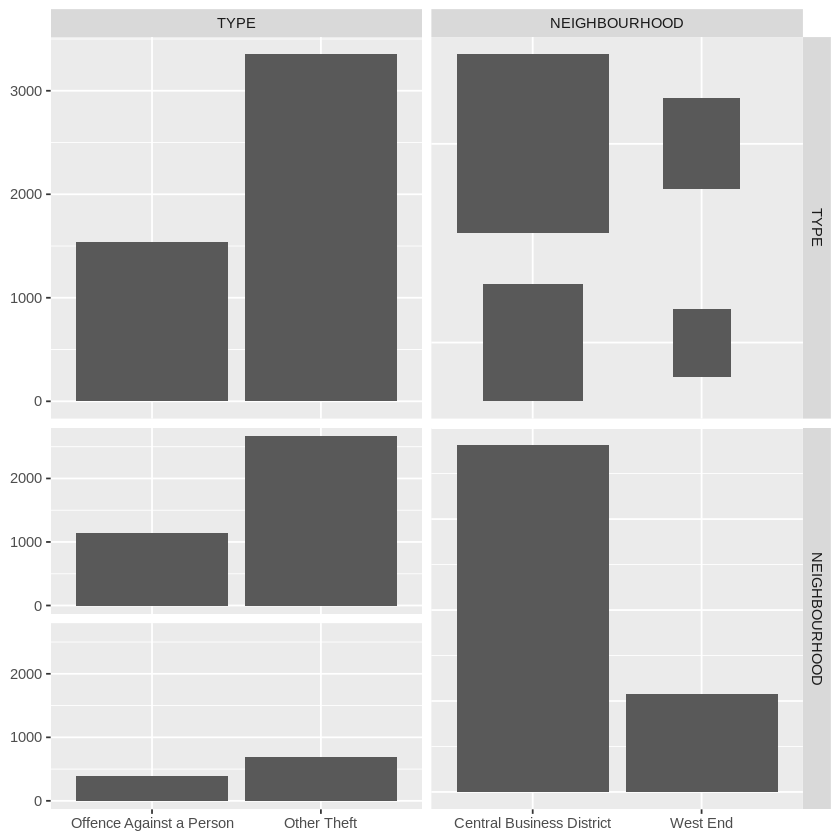

In [25]:
crime_data_plot <- ggpairs(crime_data_cleaned2)

crime_data_plot

Here we are creating and visualizing the pair plot of our cleaned data set.

#### Creating a null disribution

In [26]:
set.seed(20)
null_dist <- crime_data_cleaned2 %>%
    specify(formula = TYPE ~ NEIGHBOURHOOD, success = "Offence Against a Person") %>%
    hypothesize(null = "independence") %>%
    generate(reps = 400, type = "permute") %>%
    calculate(stat = "diff in props", order = c("Central Business District", "West End"))
head(null_dist)

replicate,stat
<int>,<dbl>
1,0.001309837
2,-0.027351614
3,-0.015409343
4,-0.015409343
5,0.009669427
6,-0.014215116


Above is the null distribution of our cleaned data set `crime_data_cleaned2`.

#### Visualizing our null distribution

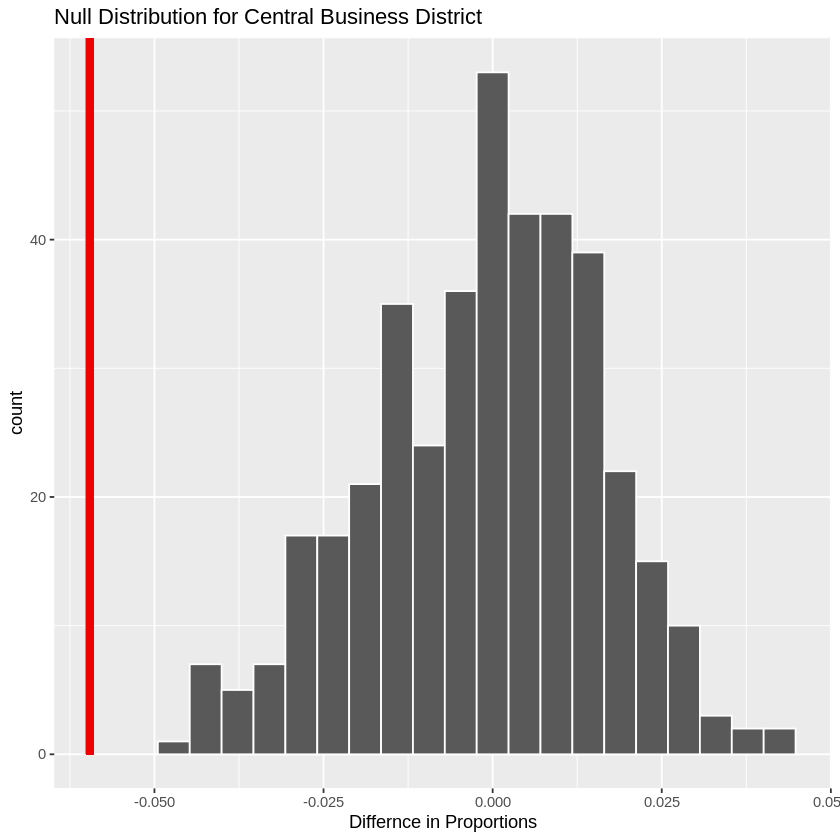

In [27]:
hypo_test_plot <- null_dist %>%
    visualize(bins = 20) +
    shade_p_value(obs_stat = obs_diff_prop1, direction = "left") + 
    xlab("Differnce in Proportions") +
    ggtitle("Null Distribution for Central Business District")
hypo_test_plot

Here is the visualization of our null hypothesis which shows that our p-value is not inside of the distribution, suggesting that the p-value is very small and should be rejected.

#### Getting the p-value from our null distribution

In [28]:
p_value <- null_dist %>%
    get_p_value(obs_stat = obs_diff_prop1, direction = "left")
p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


We now use the `infer` package to get the p-value. Since our p-value is 0 which is less than α = 0.05, we will reject the null hypothesis.

#### Creating a bootstrap distribution from our dataset

In [29]:
set.seed(20)
bootstrap_dist <- crime_data_cleaned2 %>%
    specify(formula = TYPE ~ NEIGHBOURHOOD, success = "Offence Against a Person") %>%
    generate(reps = 400, type = "bootstrap") %>%
    calculate(stat = "diff in props", order = c("Central Business District", "West End"))
head(bootstrap_dist)

replicate,stat
<int>,<dbl>
1,-0.07999129
2,-0.06747456
3,-0.07967087
4,-0.05339089
5,-0.05320912
6,-0.06902432


We create a bootstrap distribution of our cleaned dataset so we can find a confidence interval and visualize it.

#### Getting the confidence interval from our bootstrap distribution

In [ ]:
ci <- bootstrap_dist %>%
        summarise(lower_ci = quantile(stat, 0.025), upper_ci = quantile(stat, 0.975))
ci

lower_ci,upper_ci
<dbl>,<dbl>
-0.09025807,-0.02443591


We calculate the 95% confidence interval which is between -0.09025807 and -0.02443591.

#### Visualizing the confidence interval of our bootstrap distribution

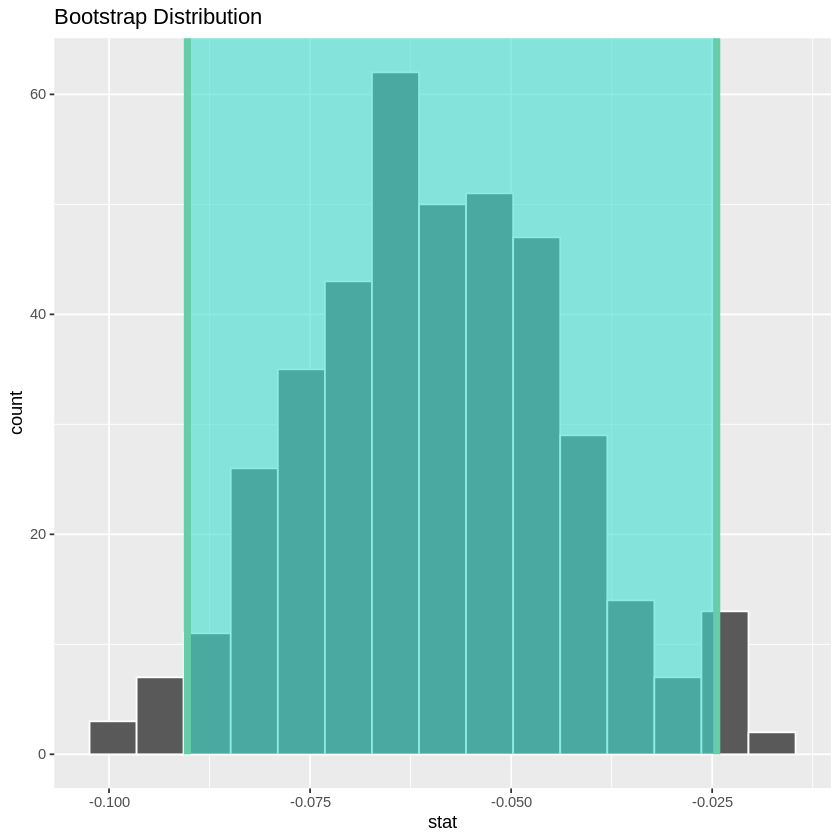

In [31]:
ci_plot <- bootstrap_dist %>%
    visualize() +
    shade_confidence_interval(endpoints = ci) +
    ggtitle("Bootstrap Distribution")
ci_plot

What this visualization shows is that we are 95% confident that the true proportion difference is between `-0.09025807` and `-0.02443591`. With that, we are 95% confident that the proportion of theft from vehicles among all other types of crime in West End is less than the proportion in Central Business District in Vancouver, accepting our alternative hypothesis.

#### Creating a second hypothesis test with different neighbourhoods

##### 
**Research Question:**
<i>H<sub>θ</sub></i> = The proportion of theft from vehicles among all other types of crime is the same in Kitsilano and Kerrisdale in Vancouver<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<i>H<sub>1</sub></i> = The proportion of theft from vehicles among all other types of crime in Kerrisdale is less than the proportion in Kitsilano in Vancouver

In [68]:
crime_data_clean <- crime_data %>% 
    filter(TYPE == "Offence Against a Person" | TYPE == "Other Theft")%>%
    filter(!is.na(NEIGHBOURHOOD)) %>%
    filter(!is.na(TYPE))%>%
    select(TYPE,NEIGHBOURHOOD)

head(crime_data_clean)

TYPE,NEIGHBOURHOOD
<chr>,<chr>
Offence Against a Person,Stanley Park
Offence Against a Person,Stanley Park
Offence Against a Person,West End
Offence Against a Person,West End
Offence Against a Person,West End
Offence Against a Person,West End


We want to create a second hypothesis test to compare to the our first hypothesis test. Again we filter `crime_data` so the only crime types are `Offence Against a Person` and `Other Theft`, and all missing values are filtered out.

#### Filtering the dataset for new chosen `NEIGHBOURHOOD`

In [69]:
crime_data_clean2 <- crime_data_clean  %>%
    filter(NEIGHBOURHOOD == "Kitsilano" | NEIGHBOURHOOD == "Kerrisdale")
head(crime_data_clean2)

TYPE,NEIGHBOURHOOD
<chr>,<chr>
Offence Against a Person,Kitsilano
Offence Against a Person,Kitsilano
Offence Against a Person,Kitsilano
Offence Against a Person,Kitsilano
Offence Against a Person,Kitsilano
Offence Against a Person,Kitsilano


We create `crime_data_clean2` which contains `crime_data_clean`, but this time we will filter to choose `Kitsilano` and `Kerrisdale` for the neighbourhoods.

#### Counting the crime type per `NEIGHBOURHOOD` in question for crime with the crime `TYPE`

In [70]:
crime_count2 <- crime_data_clean2 %>%
    group_by(NEIGHBOURHOOD) %>%
    count(TYPE)
crime_count2

NEIGHBOURHOOD,TYPE,n
<chr>,<chr>,<int>
Kerrisdale,Offence Against a Person,16
Kerrisdale,Other Theft,80
Kitsilano,Offence Against a Person,48
Kitsilano,Other Theft,288


Creating a variable `crime_count2` that has the amount of times our chosen crimes were committed and recorded in our two new chosen neighbourhoods.

#### Calculating difference in proportions

In [71]:
obs_diff_props1 <- crime_data_clean2 %>%
    specify(formula = TYPE ~ NEIGHBOURHOOD, success = "Offence Against a Person") %>%
    calculate(stat = "diff in props", order = c("Kitsilano", "Kerrisdale"))
obs_diff_props1

stat
<dbl>
-0.02380952


Calculating the test statistic of `Offence Against a Person` in Kitsilano and Kerrisdale.

In [72]:
obs_diff_props2 <- crime_data_clean2 %>%
    specify(formula = TYPE ~ NEIGHBOURHOOD, success = "Other Theft") %>%
    calculate(stat = "diff in props", order = c("Kitsilano", "Kerrisdale"))
obs_diff_props2

stat
<dbl>
0.02380952


Calculating the test statistic of `Other Theft` in Kitsilano and Kerrisdale.

#### Plotting a bar graph of `crime_count2`

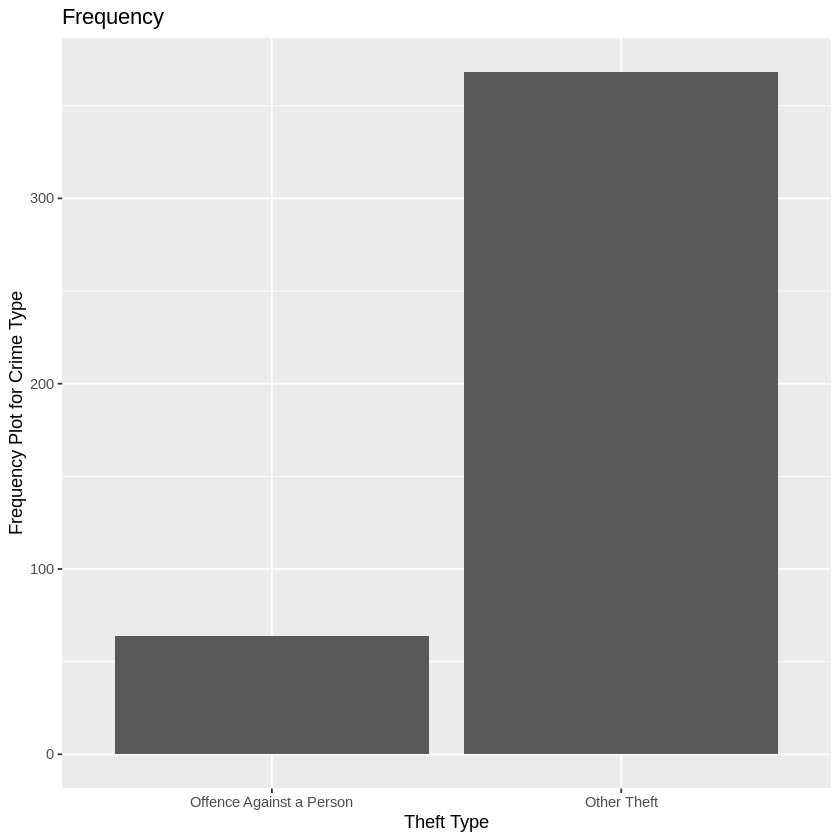

In [73]:
crime_data_count_plot2 <- crime_count2 %>%
       ggplot(aes(x = TYPE, y = n)) + 
       geom_col() +
       ggtitle("Frequency") +
       xlab("Theft Type")+
       ylab("Frequency Plot for Crime Type")

crime_data_count_plot2

We create a bar graph of `crime_count2` which visually shows the amount of our chosen crimes commited in our new chosen neighbourhoods.

#### Plotting a pair plot

In [ ]:
crime_data_plot2 <- ggpairs(crime_data_clean2)

crime_data_plot2

ERROR: Error in ggpairs(crime_data_clean2): could not find function "ggpairs"


Creating and visualizing a pair plot `crime_data_clean2`.

#### Creating a null distribution for our second hypothesis test 

In [75]:
set.seed(20)
null_dist2 <- crime_data_clean2 %>%
    specify(formula = TYPE ~ NEIGHBOURHOOD, success = "Offence Against a Person") %>%
    hypothesize(null = "independence") %>%
    generate(reps = 400, type = "permute") %>%
    calculate(stat = "diff in props", order = c("Kitsilano", "Kerrisdale"))
head(null_dist2)

replicate,stat
<int>,<dbl>
1,-0.01041667
2,-0.01041667
3,0.04315476
4,0.01636905
5,-0.06398810
6,-0.06398810


Now we create a null distribution of `crime_data_clean2` which will be used to find the p-value. 

#### Visualizing the difference in proportions of `null_dist2`

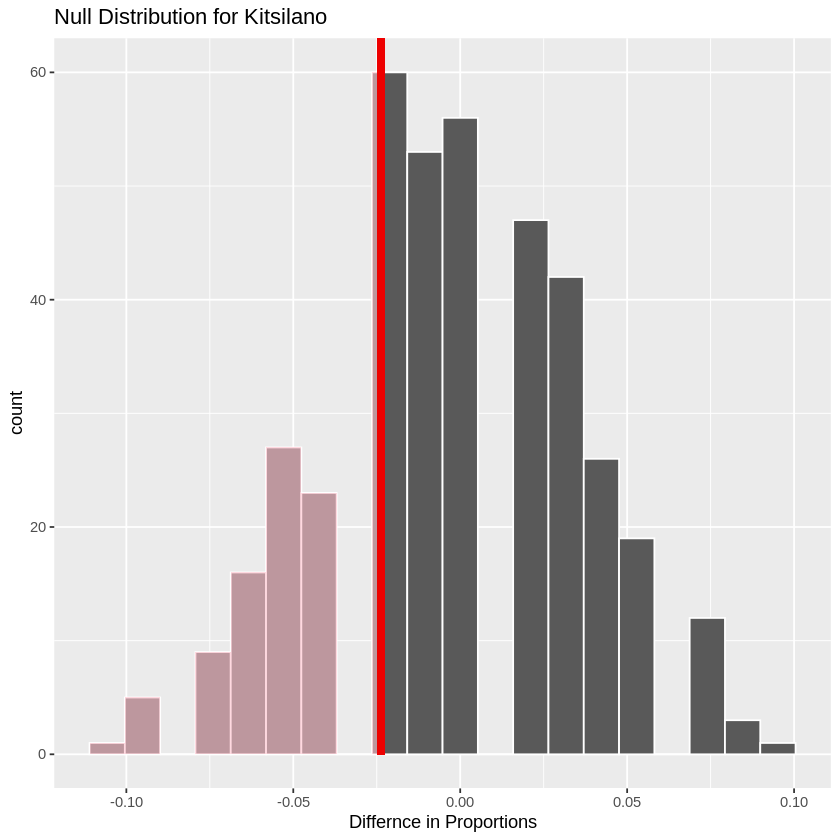

In [76]:
hypo_test_plot2 <- null_dist2 %>%
    visualize(bins = 20) +
    shade_p_value(obs_stat = obs_diff_props1, direction = "left") + 
    xlab("Difference in Proportions") +
    ggtitle("Null Distribution for Kitsilano")
hypo_test_plot2

Visualizing `null_dist2`, we see that our p-value is inside of our distribution, suggesting that the p-value is not very small and maybe we should accept.

#### Getting the p-value from `null_dist2`

In [77]:
p_value2 <- null_dist2 %>%
    get_p_value(obs_stat = obs_diff_props1, direction = "left")
p_value2

p_value
<dbl>
0.3525


We get a p-value of 0.3525, concluding that the p-value > α (α = 0.05), meaning that we will accept our null hypothesis.

#### Creating a bootstrap distribution for our second hypothesis test

In [78]:
set.seed(20)
bootstrap_dist2 <- crime_data_clean2 %>%
    specify(formula = TYPE ~ NEIGHBOURHOOD, success = "Offence Against a Person") %>%
    generate(reps = 400, type = "bootstrap") %>%
    calculate(stat = "diff in props", order = c("Kitsilano", "Kerrisdale"))
head(bootstrap_dist2)

replicate,stat
<int>,<dbl>
1,-0.034446665
2,-0.020076726
3,0.008928571
4,0.006344616
5,-0.043606138
6,0.039886040


We now create a bootstrap distribution of `crime_data_clean2` to be used when getting a confidence interval.

#### Getting the confidence interval of `bootstrap_dist2`

In [79]:
ci2 <- bootstrap_dist2 %>%
        summarise(lower_ci = quantile(stat, 0.025), upper_ci = quantile(stat, 0.975))
ci2

lower_ci,upper_ci
<dbl>,<dbl>
-0.09888061,0.05734264


We calculate the 95% confidence interval which is between -0.09888061 and 0.05734264.

#### Visualizing the confidence interval of `bootstrap_dist2`

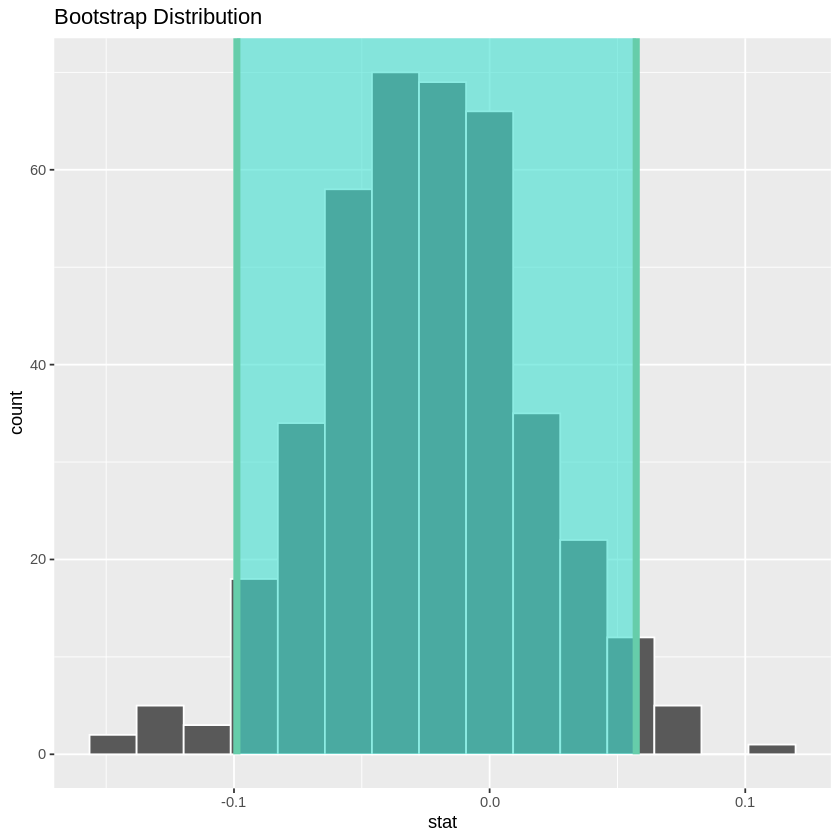

In [80]:
ci_plot2 <- bootstrap_dist2 %>%
    visualize() +
    shade_confidence_interval(endpoints = ci2) +
    ggtitle("Bootstrap Distribution")
ci_plot2

This visualization shows is that we are 95% confident that the true proportion difference is between `-0.09888061` and `0.05734264`. With that, we are 95% confident that the proportion of theft from vehicles among all other types of crime is the same in Kitsilano and Kerrisdale in Vancouver, accepting our null hypothesis.

## Conclusion


**METHODS: PLAN**
We’ll begin be using Hypothesis testing to assess the plausibility of the hypothesis, whether the data obtained from samples provides evidence against our claim that H. Through the infer workflow, which ensures tidy and clean data while using expressive grammar for the statistical inference, we will calculate the p-value. The p-value will be used to reject the null hypothesis H. Then through samples obtained through bootstrap resampling with replacement, which allows us to mimic sampling variation without the full population, we will calculate our point estimate of sample proportion and visualize the results with a confidence interval of 95% to conclude to stakeholders how confident we are with the results. 

We expect that the p-value to be smaller than the significance level to reject H. This can prove our point that the Central Business District has higher crime rates than the West End. 

The significance of this report and its final results can allow us to determine which areas require higher levels of law enforcement and increased levels of safety.

**REFERENCES:**
CBC News. 2022. New study shows higher incidence of violent crime in poor Vancouver neighborhoods,theft in wealthier ones. [assessed 2022 Oct 29].
https://www.cbc.ca/news/canada/british-columbia/sfu-study-vancouver-crime-impacts-1.6323902#:~:text=Andresen%20says%20this%20can%20be,happened%20normally%2C%22%20he%20said.

The Canadian Press. 2017. Soaring rents push homelessness to all-time high in vancouver’s DTES. [assessed 2022 Oct 29]. https://www.cbc.ca/news/canada/british-columbia/rent-increase-dtes-vancouver-homelessness-1.4034161.

Numbeo. Crime in Vancouver, Canada. Numbeo. [assessed 2022 Oct 29]. https://www.numbeo.com/crime/in/Vancouver.

Webster B R. How are the bad areas in Vancouver? [assessed 2022 Oct 29]. https://newcanadianlife.com/what-are-the-bad-areas-in-vancouver/.


